# Machine Learning-Enhanced Automation and Uncertainty Analysis for Modal Frequency-Based SHM Under Changing Conditions: An Offshore Wind Turbine Use Case

## 1.Introduction

Vibration-based Structural Health Monitoring (SHM) is a widely used method to ensure structural integrity and optimize the available useful life of many different structures \citep{SALAWU1997_FrequencyMonitoring, Doebling1998_VibrationDmgDetection, Yang2021_VibrationSHM, Peeters2001_VibrationDmgDetection}. Vibration-based SHM often involves the tracking and monitoring of the modal parameters \cite{}.

### 1.1 Article Outline

# 2. Instrumented Offshore Wind Turbine

The research uses real-world monitoring data gathered from monopile-supported OWTs located in the Belgian North Sea. The OWT is instrumented with an Internet of Things (IoT) high-end accelerometer in the Rotor-Nacelle Assembly (RNA) as shown in Figure \ref{fig:owt_setup}. The ACC enables an accurate calculation of the dynamic response of the OWT through a modal parameter estimation every 10 minutes. 

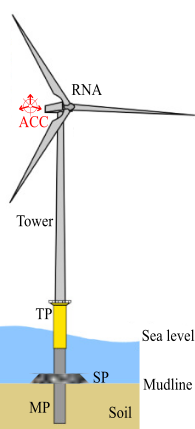

\caption{Offshore Wind Turbine monitoring setup with 1 accelerometer at the top of the tower} \label{fig:owt_setup}


In [6]:
%matplotlib inline
from IPython.display import Image
display(Image('figures/OWT_setup.png'))
print('\caption{Offshore Wind Turbine monitoring setup with 1 accelerometer at the top of the tower} \label{fig:owt_setup}')

### 2.1 Offshore Wind Turbine Monitoring Data

The used dataset consists of a 1-year monitoring period for a modern OWT. 

### 2.2 External Data Sources
External data sources are used to better describe the environmental and operational condition of the monitored structures. The weather data collected by weather stations is used in this research. For the Belgian North Sea, the \textit{Meetnet Vlaamse Banken (mvbc)} provides an API to collect the weather data from all measuring piles and buoys in the Belgian North Sea \footnote{\url{https://meetnetvlaamsebanken.be/}}. A python package was developped specifically to interact with the mvbc API to automatically gather long-term data from different weather stations and weather buoys \citep{VUB-MVBC package}.

## 3. Methodology
This section details the methodology used in this research to automate the Structural Health Monitoring (SHM) process. The methodology can be divided into three separate parts.

The first part is an initialization step involving an Operational Modal Analysis (OMA) to calculate the modal parameters. Following the OMA, initial physical modes are identified in different ways on a training dataset, consisting of the healthy strcuture. The identification step can be done through unsupervised clustering combined with corrections made by an interpreter and physical knowledge of the structure or through manual selection of a high quality representative dataset. 

In the second part, the identified initial physical modes are used to train a machine learning model to predict the different physical modes based on the data representing the Environmental and Operational Conditions (EOCs) of the OWT. This data consists of the data sets described in Section \ref{sec:2}. Data selection, hyperparameter optimization, and model comparison lead to the model with the lowest error and a short training and prediction time.

The optimal ML model is then used in the third and final part of the methodology for smart tracking of the modes by combining the model prediction and Uncertainty Quantification (UQ) methods. Finally, the tracked modes ares used to generate control charts and automate the modal parameter-based SHM.

### 3.1. Physical Mode Initialization
Traditionally, the tracking of the physical modes for SHM involves manually selecting the modes of interest from an analysis on an initialization dataset \citep{devriendt2014_automatedOMA, Verboven2002_MPEtracking, oliveira2018vibration, MAGALHAES2012_OMAtoDMG, Ubertini2016_SHMBellTower, MARTINS2014_SHMStadiumRoof}. 

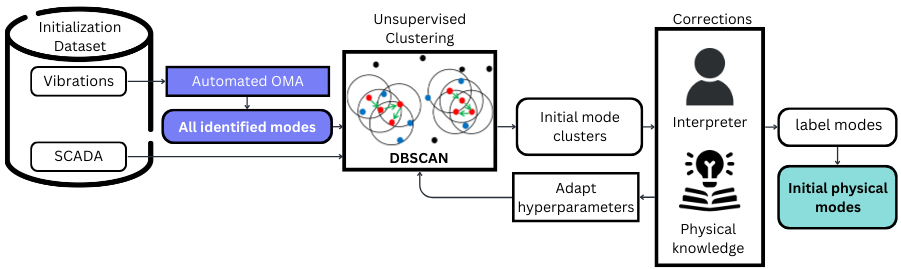

\caption{Flowchart showing the construction process of the EOV normalization models. The inputs and target data are summarized in Table}\label{fig:Flowchart_Initialisation_clustering}
ADD MANUAL DATA SELECTION


In [15]:
%matplotlib inline
from IPython.display import Image
display(Image('figures/Flowchart_Initialisation_clustering.png'))
print('\caption{Flowchart showing the construction process of the EOV normalization models. The inputs and target data are summarized in Table}\label{fig:Flowchart_Initialisation_clustering}')

print('\033[91m' + 'ADD MANUAL DATA SELECTION' + '\033[0m')


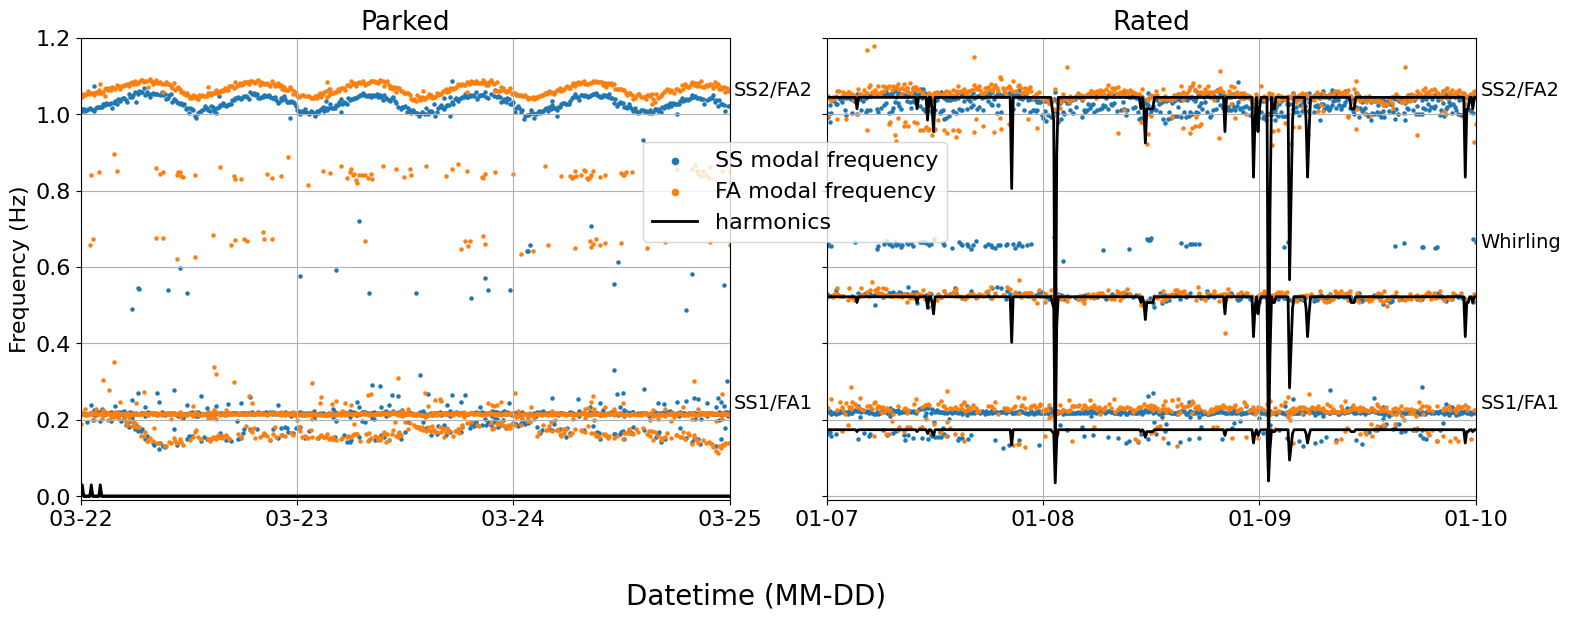

In [157]:
import os
import pandas as pd
import datetime
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.dates as mdates

def figure_harmonics(start1, end1, start2, end2):
    package_folder = os.path.dirname(os.path.dirname(os.getcwd()))
    data_folder = os.path.join(package_folder, 'data')

    mpe_ss_data = pd.read_parquet(os.path.join(data_folder, 'paper','3', '3.1', 'mpe_ss_data.parquet'))
    mpe_fa_data = pd.read_parquet(os.path.join(data_folder, 'paper','3', '3.1', 'mpe_fa_data.parquet'))
    harmonics_data = pd.read_parquet(os.path.join(data_folder, 'paper','3', '3.1', 'harmonics_data.parquet'))
    
    plt.rcParams.update({'font.size': 16})
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18,6), sharey=True)

    # Plot for the first time period
    ax1.scatter(mpe_ss_data.loc[start1:end1].index, mpe_ss_data.loc[start1:end1]['mean_frequency'], s=5, alpha=1.0, color='tab:blue', label='SS modal frequency')
    ax1.scatter(mpe_fa_data.loc[start1:end1].index, mpe_fa_data.loc[start1:end1]['mean_frequency'], s=5, alpha=1.0, color='tab:orange', label='FA modal frequency')

    colors = ['tab:green', 'tab:red', 'tab:purple', 'tab:brown']
    for i, harmonic in enumerate(harmonics_data.columns[:3]):
        ax1.plot(harmonics_data.loc[start1:end1].index, harmonics_data.loc[start1:end1][harmonic], label=' '.join(harmonic.split('_')), alpha=1.0, linewidth=2.0, color='k')

    ax1.set_xlim(start1, end1)
    ax1.set_ylim(-0.01,1.2)
    #ax1.set_xlabel('Datetime (YYYY-MM-DD)')
    ax1.set_ylabel('Frequency (Hz)')
    ax1.set_title('Parked')
    ax1.grid()
    ax1.text(end1+datetime.timedelta(hours=0.5), 1.05, 'SS2/FA2', fontsize=14, rotation=0)
    ax1.text(end1+datetime.timedelta(hours=0.5), 0.23, 'SS1/FA1', fontsize=14, rotation=0)

    # Plot for the second time period
    ax2.scatter(mpe_ss_data.loc[start2:end2].index, mpe_ss_data.loc[start2:end2]['mean_frequency'], s=5, alpha=1.0, color='tab:blue', label='SS modal frequency')
    ax2.scatter(mpe_fa_data.loc[start2:end2].index, mpe_fa_data.loc[start2:end2]['mean_frequency'], s=5, alpha=1.0, color='tab:orange', label='FA modal frequency')

    for i, harmonic in enumerate(harmonics_data.columns[:3]):
        ax2.plot(harmonics_data.loc[start2:end2].index, harmonics_data.loc[start2:end2][harmonic], label=' '.join(harmonic.split('_')), alpha=1.0, linewidth=2.0, color='k')

    ax2.set_xlim(start2, end2)
    
    legend = ax2.legend(['SS modal frequency', 'FA modal frequency', 'harmonics'], loc='upper left', bbox_to_anchor=(-0.3, 0.8), fontsize=16)
    for handles in legend.legend_handles[:2]:
        handles.set_sizes([20.0])
    ax2.grid()
    ax2.set_title('Rated')
    ax2.text(end2+datetime.timedelta(hours=0.5), 1.05, 'SS2/FA2', fontsize=14, rotation=0)
    ax2.text(end2+datetime.timedelta(hours=0.5), 0.65, 'Whirling', fontsize=14, rotation=0)
    ax2.text(end2+datetime.timedelta(hours=0.5), 0.23, 'SS1/FA1', fontsize=14, rotation=0)
    
    # Format x-axis ticks
    date_formatter = mdates.DateFormatter('%m-%d')
    ax1.xaxis.set_major_formatter(date_formatter)
    ax2.xaxis.set_major_formatter(date_formatter)
    # Adjust x-axis tick frequency
    ax1.xaxis.set_major_locator(ticker.MaxNLocator(3))

    ax2.xaxis.set_major_locator(ticker.MaxNLocator(3))
    # #rotate xtixk labels
    # for tick in ax1.get_xticklabels():
    #     tick.set_rotation(20)
    # for tick in ax2.get_xticklabels():
    #     tick.set_rotation(20)

    # Set common xlabel for the figure
    fig.text(0.5, -0.05, 'Datetime (MM-DD)', ha='center', va='center', fontsize=20)
    plt.subplots_adjust(wspace=0.15)
    plt.show()

# Example usage
figure_harmonics(
    start1 = datetime.datetime(2023, 3, 22, tzinfo=datetime.timezone.utc),
    end1 = datetime.datetime(2023, 3, 25, tzinfo=datetime.timezone.utc),
    start2 = datetime.datetime(2023, 1, 7, tzinfo=datetime.timezone.utc),
    end2 = datetime.datetime(2023, 1, 10, tzinfo=datetime.timezone.utc),
)


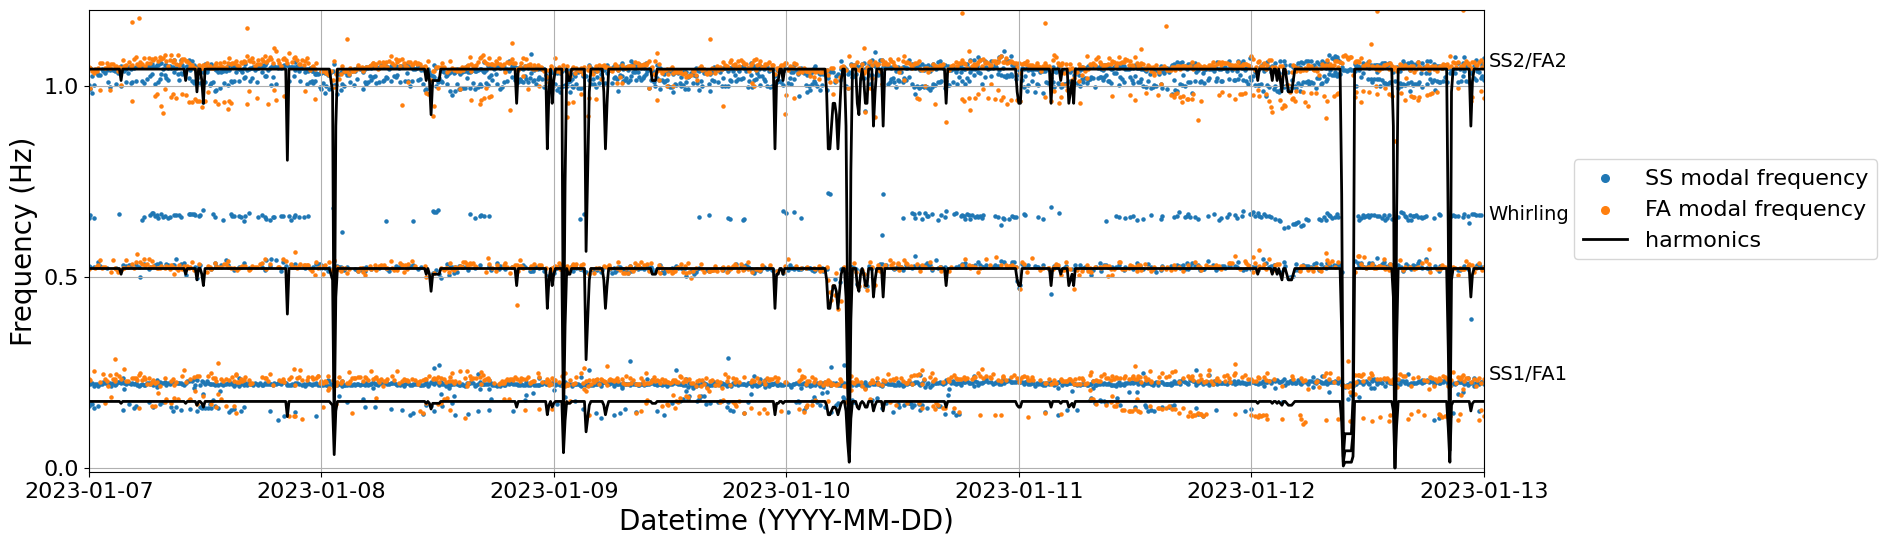

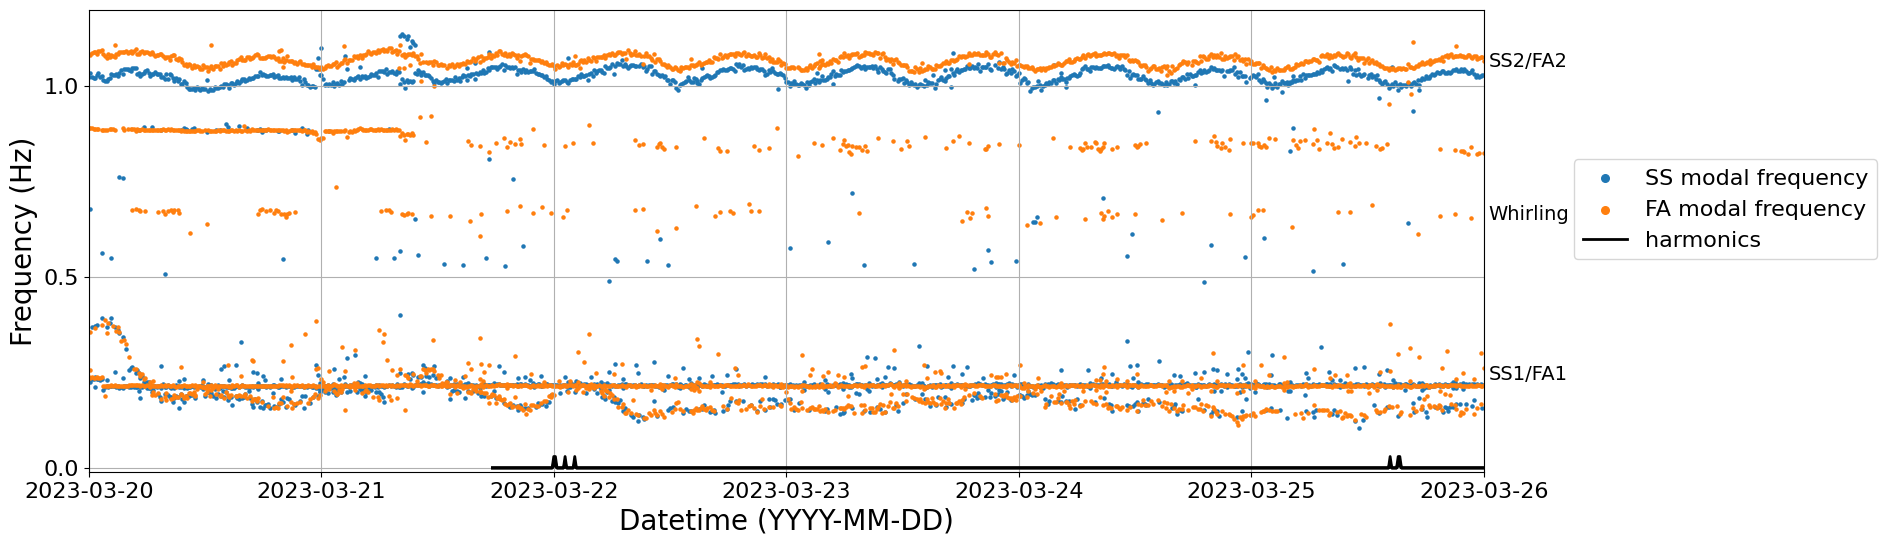

In [123]:
import os
import pandas as pd
import datetime
import numpy as np
import matplotlib.pyplot as plt
def figure_harmonics(start, end):

    package_folder = os.path.dirname(os.path.dirname(os.getcwd()))
    data_folder = os.path.join(package_folder, 'data')

    mpe_ss_data = pd.read_parquet(os.path.join(data_folder, 'paper','3', '3.1', 'mpe_ss_data.parquet'))
    mpe_fa_data = pd.read_parquet(os.path.join(data_folder, 'paper','3', '3.1', 'mpe_fa_data.parquet'))
    harmonics_data = pd.read_parquet(os.path.join(data_folder, 'paper','3', '3.1', 'harmonics_data.parquet'))
    plt.rcParams.update({'font.size': 16})

    plt.figure(figsize=(18,6))    
    plt.scatter(mpe_ss_data.loc[start:end].index, mpe_ss_data.loc[start:end]['mean_frequency'], s=5, alpha=1.0, color='tab:blue', label='SS modal frequency')
    plt.scatter(mpe_fa_data.loc[start:end].index, mpe_fa_data.loc[start:end]['mean_frequency'], s=5, alpha=1.0, color='tab:orange', label='FA modal frequency')

    colors = ['tab:green', 'tab:red', 'tab:purple', 'tab:brown']
    i = 0
    for harmonic in harmonics_data.columns[:3]:
        plt.plot(harmonics_data.loc[start:end].index, harmonics_data.loc[start:end][harmonic], label=' '.join(harmonic.split('_')), alpha=1.0, linewidth=2.0, color='k')
        i += 1
    plt.xlim(start, end)
    plt.ylim(-0.01,1.2)
    legend = plt.legend(['SS modal frequency', 'FA modal frequency', 'harmonics'], loc='upper right', bbox_to_anchor=(1.29, 0.7), fontsize=16)
    for handles in legend.legend_handles[:2]:
        handles.set_sizes([20.0])
    plt.xlabel('Datetime (YYYY-MM-DD)', fontsize=20)
    plt.ylabel('Frequency (Hz)', fontsize=20)
    plt.yticks(np.arange(0, 1.2, 0.5))
    plt.text(end+datetime.timedelta(hours=0.5), 1.05, 'SS2/FA2', fontsize=14, rotation=0)
    plt.text(end+datetime.timedelta(hours=0.5), 0.65, 'Whirling', fontsize=14, rotation=0)
    plt.text(end+datetime.timedelta(hours=0.5), 0.23, 'SS1/FA1', fontsize=14, rotation=0)

    plt.grid()
    plt.show()
    plt.close()
figure_harmonics(
    start = datetime.datetime(2023, 1, 7, tzinfo=datetime.timezone.utc),
    end = datetime.datetime(2023, 1, 13, tzinfo=datetime.timezone.utc))
figure_harmonics(
    start = datetime.datetime(2023, 3, 20, tzinfo=datetime.timezone.utc),
    end = datetime.datetime(2023, 3, 26, tzinfo=datetime.timezone.utc))

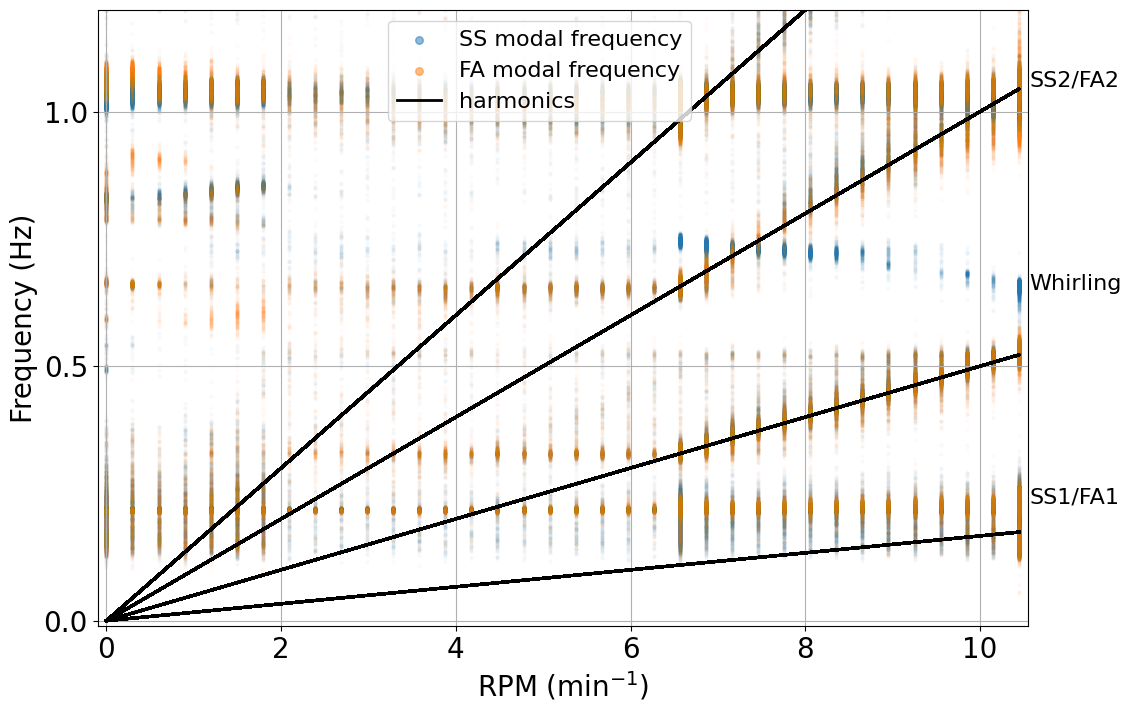

In [152]:
def campbell_plot():
    package_folder = os.path.dirname(os.path.dirname(os.getcwd()))
    data_folder = os.path.join(package_folder, 'data')

    mpe_ss_data = pd.read_parquet(os.path.join(data_folder, 'paper','3', '3.1', 'mpe_ss_data.parquet'))
    mpe_fa_data = pd.read_parquet(os.path.join(data_folder, 'paper','3', '3.1', 'mpe_fa_data.parquet'))
    harmonics_data = pd.read_parquet(os.path.join(data_folder, 'paper','3', '3.1', 'harmonics_data.parquet'))
    turbine_data = pd.read_parquet(os.path.join(data_folder, 'paper','3', '3.1', 'turbine_data.parquet'))
    mpe_ss_data['rpm'] = turbine_data.filter(regex='rpm')
    mpe_fa_data['rpm'] = turbine_data.filter(regex='rpm')
    harmonics_data['rpm'] = turbine_data.filter(regex='rpm')

    plt.rcParams.update({'font.size': 20})

    plt.figure(figsize=(12,8))    
    plt.scatter(mpe_ss_data['rpm'], mpe_ss_data['mean_frequency'], s=5, alpha=0.02, color='tab:blue', label='SS modal frequency')
    plt.scatter(mpe_fa_data['rpm'], mpe_fa_data['mean_frequency'], s=5, alpha=0.02, color='tab:orange', label='FA modal frequency')

    colors = ['tab:green', 'tab:red', 'tab:purple', 'tab:brown']
    i = 0
    for harmonic in harmonics_data.columns[:4]:
        plt.plot(harmonics_data['rpm'], harmonics_data[harmonic], label=' '.join(harmonic.split('_')), alpha=1.0, linewidth=2.0, color='k')
        i += 1
    plt.ylim(-0.01,1.2)
    plt.xlim(mpe_ss_data['rpm'].min()-0.1, mpe_ss_data['rpm'].max()+0.1)
    legend = plt.legend(['SS modal frequency', 'FA modal frequency', 'harmonics'], loc='upper right', bbox_to_anchor=(0.65, 1.0), fontsize=16)
    for handles in legend.legend_handles[:2]:
        handles.set_sizes([30.0])
        handles.set_alpha(0.5)
    plt.xlabel('RPM (min$^{-1}$)', fontsize=20)
    plt.ylabel('Frequency (Hz)', fontsize=20)
    plt.yticks(np.arange(0, 1.2, 0.5))
    plt.text(mpe_ss_data['rpm'].max()+0.12, 1.05, 'SS2/FA2', fontsize=16, rotation=0)
    plt.text(mpe_ss_data['rpm'].max()+0.12, 0.65, 'Whirling', fontsize=16, rotation=0)
    plt.text(mpe_ss_data['rpm'].max()+0.12, 0.23, 'SS1/FA1', fontsize=16, rotation=0)

    plt.grid()
    plt.show()
    plt.close()
campbell_plot()  

### 3.2. Machine Learning Model for Modal Frequency Prediction under Changing Conditions

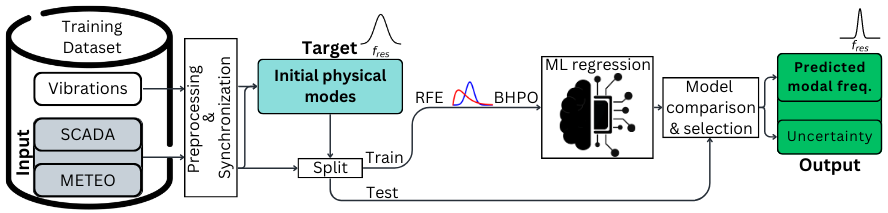

\caption{Flowchart showing the construction process of the EOV normalization models. The inputs and target data are summarized in Table \ ref{tab:data_description}}\label{fig:Flowchart_ML_model_preparation}


In [18]:
%matplotlib inline
from IPython.display import Image
display(Image('figures/Flowchart_ML_model_preparation.png'))
print('\caption{Flowchart showing the construction process of the EOV normalization models. The inputs and target data are summarized in Table \ ref{tab:data_description}}\label{fig:Flowchart_ML_model_preparation}')


### 3.3 Automated Structural Health Monitoring: OWT Case Study

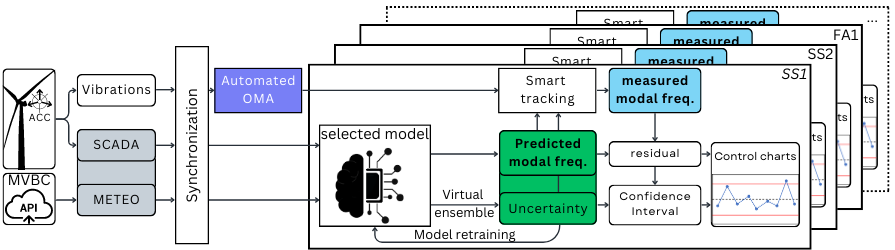

\caption{}\label{fig:Flowchart_automated_monitoring}


In [87]:
%matplotlib inline
from IPython.display import Image
display(Image('figures/Flowchart_automated_monitoring.png'))
print('\caption{}\label{fig:Flowchart_automated_monitoring}')

### 3.3.1 Smart Tracking

Traditionally, the tracking of physical modes consists of applying OMA on a time-window of the vibration time-series data measured on the structure and 

None


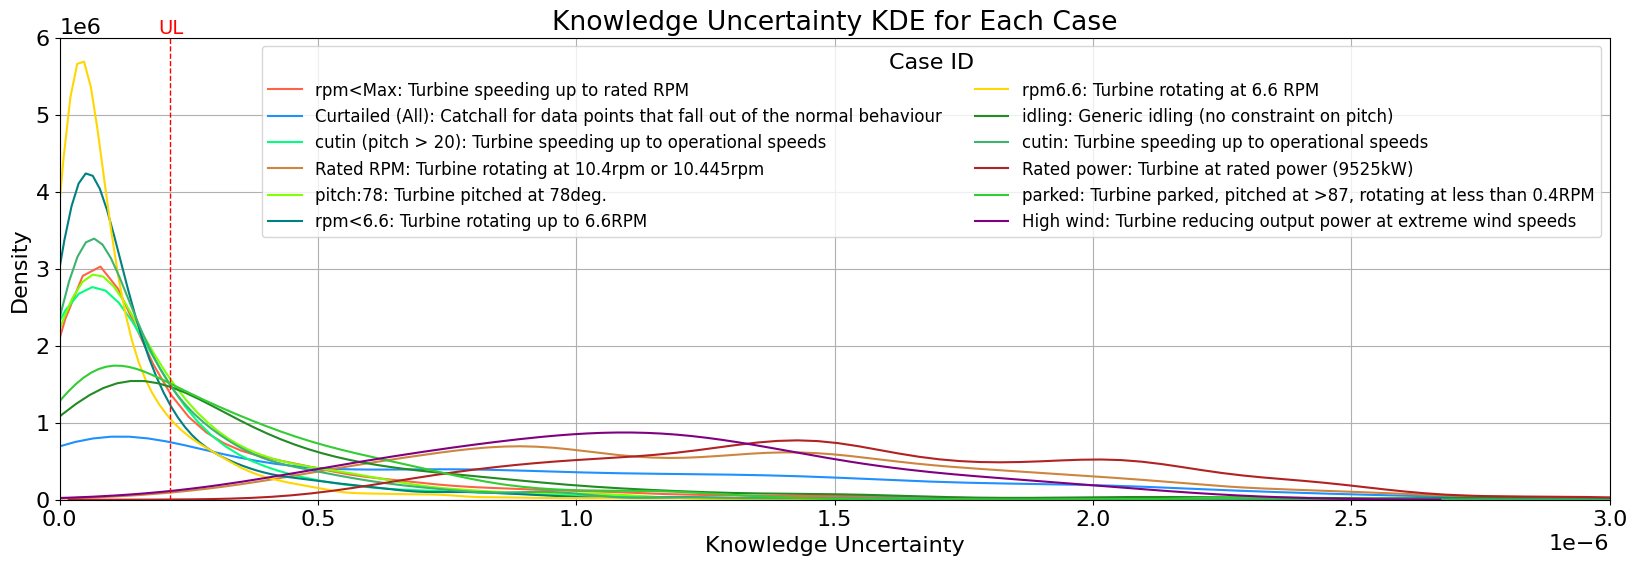

In [121]:
import seaborn as sns
import matplotlib.pyplot as plt
def case_uncertainty_distribution_pots():
    import warnings
    warnings.filterwarnings('ignore')
    package_folder = os.path.dirname(os.path.dirname(os.getcwd()))
    data_folder = os.path.join(package_folder, 'data')
    predictions_virutal_ensemble_plot = pd.read_parquet(os.path.join(data_folder, 'paper','3', '3.3', 'prediction_virtual_ensemble.parquet'))
    uncertainty_lim = 2.1331375333164705e-07 #3.778378113097412e-07 #5.902143777376365e-07 #1.199509060664933e-06 #3.215489902573316e-07 #2.6368465309163476e-07
    # Create a figure
    plt.figure(figsize=(20, 6))

    # Loop through each unique case
    unique_cases = predictions_virutal_ensemble_plot['case_ID'].unique()
    for case_ in unique_cases:
        try:
            # Filter the DataFrame for the current case
            case_data = predictions_virutal_ensemble_plot[predictions_virutal_ensemble_plot['case_ID'] == case_]

            # Get the color for this case
            case_color = case_data['case_color'].iloc[0]
            case_data.rename(columns={'knowledge_uncertainty': 'Knowledge Uncertainty'}, inplace=True)

            # Plot the KDE for this case
            sns.kdeplot(case_data['Knowledge Uncertainty'], label=case_, color=case_color)
        except:
            print(case_)


    # Add title and legend
    plt.title('Knowledge Uncertainty KDE for Each Case')
    plt.legend(title='Case ID', ncol=2, fontsize=12, loc='upper right', bbox_to_anchor=(1, 1))
    plt.xlim(0, 3e-6)
    plt.vlines(uncertainty_lim, 0, 6e6, color='red', linewidth=1, linestyle='dashed')
    plt.ylim(0, 6e6)
    plt.text(uncertainty_lim*0.9, 6e6*1.01, 'UL', color='red', fontsize=14, rotation=0)
    # Show the plot
    plt.grid(True)
    plt.show()
    plt.close()
case_uncertainty_distribution_pots()

dropped mvbc columns:  {'mvbc_WandelaarBuoy_Sea_water_temperature', 'mvbc_WandelaarMeasuringpile_Relative_humidity'}


C:\Users\Max\AppData\Local\Temp\ipykernel_16744\1164033745.py:103: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handles in legend.legendHandles:


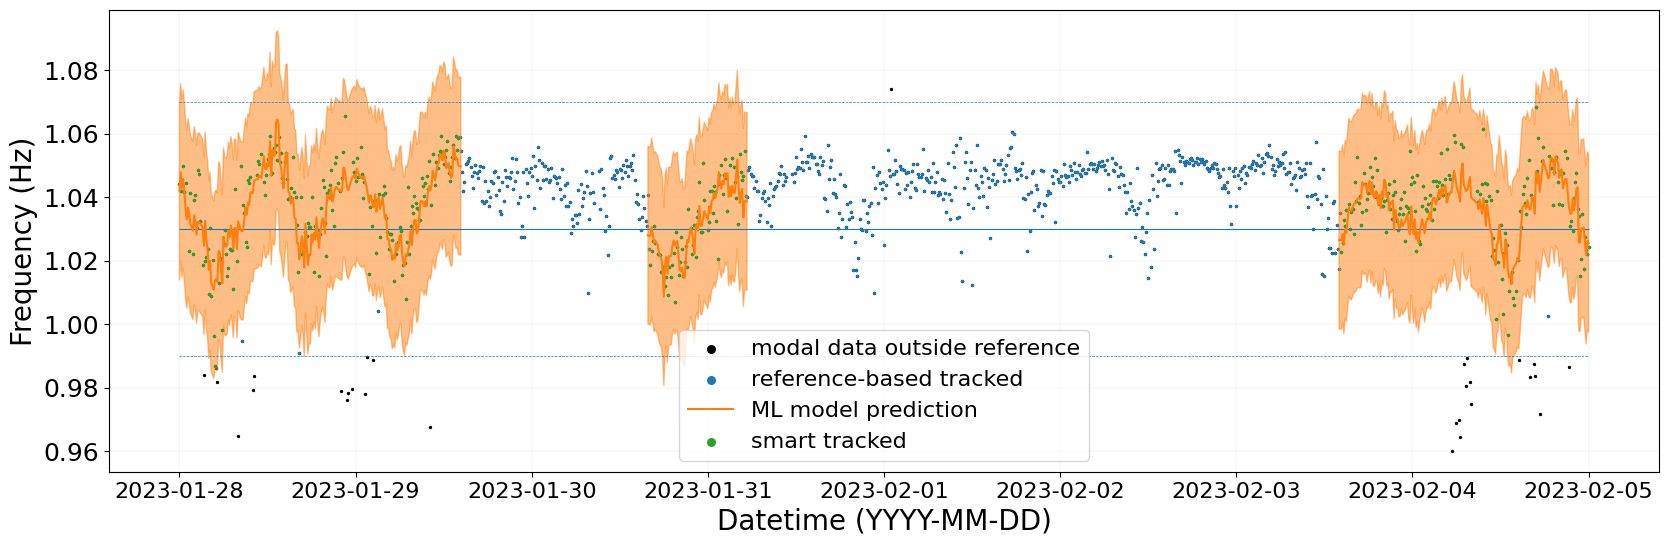

In [7]:
from src.data.make_dataset import create_input_target_dataset
from src.smart_tracking.smart_tracking import smart_tracking
from catboost import CatBoostRegressor
import matplotlib.pyplot as plt
import datetime
import os
import pandas as pd

def smart_tracking_concept(start, end, std_prediction_limit:int=2):
    package_folder = os.path.dirname(os.path.dirname(os.getcwd()))
    data_folder = os.path.join(package_folder, 'data')
    loc = 'nw2'
    turbine = 'c02'
    mode = 'SS2'
    X, y = create_input_target_dataset(data_folder, loc, turbine, mode)
    selected_data_large = pd.read_csv(os.path.join(data_folder, 'processed', loc, turbine+'_ss2_selected_data_large.csv'))
    
    # Remove the selected data with duplicated timestamps and keep the one with the biggest size
    selected_data_sorted = selected_data_large.sort_values(by='size', ascending=False)
    selected_data_unique = selected_data_sorted.drop_duplicates(subset='timestamp', keep='first')
    selected_data_unique = selected_data_unique.sort_values(by='timestamp')

    selected_columns = [
        'mean_NW2_C02_rpm',
        'mean_NW2_C02_pitch', 
        'mean_NW2_C02_power',
        'mean_NW2_C02_windspeed',
        'sin_mean_NW2_C02_yaw', 'cos_mean_NW2_C02_yaw',
        'sin_mean_NW2_C02_winddirection', 'cos_mean_NW2_C02_winddirection',
        'mvbc_WandelaarBuoy_Wave_height',
        #'mvbc_WandelaarBuoy_Average_wave_period',
        'mvbc_WandelaarMeasuringpile_Tide_TAW',
        #'mvbc_WandelaarMeasuringpile_Air_pressure',
        #'mvbc_WandelaarMeasuringpile_Air_temperature'
       ]
    
    y_train = selected_data_unique[['mean_frequency']].set_index(selected_data_unique['timestamp'])
    y_train.index = pd.to_datetime(y_train.index)
    y_train = y_train.loc[y_train.index.intersection(X.index)]
    X_train = X.loc[y_train.index]
    X_train = X_train[selected_columns]
    

    regr_model = CatBoostRegressor(iterations=1000, depth=3, learning_rate=0.5, random_seed=13,posterior_sampling=True, loss_function='RMSEWithUncertainty', verbose=False)
    regr_model.fit(X_train, y_train)

        # Full model predictions
    predictions = regr_model.predict(X)
    predictions_df = pd.DataFrame(predictions, columns=['prediction', 'spread'], index=X.index)
    predicted_value = predictions[:,0]
    predicted_total_uncertainty = predictions[:,1]

    # Virtual ensemble predictions
    virtual_ensemble_preds = regr_model.virtual_ensembles_predict(X, prediction_type='TotalUncertainty', virtual_ensembles_count=500, ntree_end=1000) #, virtual_ensembles_count=100, ntree_end=200)
    virtual_ensemble_preds_df = pd.DataFrame(virtual_ensemble_preds, columns=['prediction', 'knowledge uncertainty', 'data uncertainty'], index=X.index)

    virtual_ensemble_preds_mean = virtual_ensemble_preds[:,0] # mean values predicted by a virtual ensemble
    knowledge_uncertainty = virtual_ensemble_preds[:,1] # knowledge uncertainty predicted by a virtual ensemble
    data_uncertainty = virtual_ensemble_preds[:,2] # average estimated data uncertainty
    
    prediction_lim = (y - predictions_df['prediction']).loc[X_train.index].std()*std_prediction_limit
    uncertainty_ = pd.Series(knowledge_uncertainty, index=X.index).copy()
    uncertainty_moving_avg = pd.Series(uncertainty_, index=X.index).rolling(6*6, center=True).mean()
    uncertainty_lim = uncertainty_moving_avg.loc[X_train.index].quantile(0.99)

    smart_tracked_modes = smart_tracking(y, predictions_df['prediction'], uncertainty_moving_avg, uncertainty_lim, prediction_lim)

    analyzed_timeframe = (
    start, end
    )
    #prediction_lim = np.abs((y - predictions_df['prediction']).loc[X_train.index]).quantile(0.99)
    prediction_lim = (y - predictions_df['prediction']).loc[X_train.index].std()*2

    plt_selected_input_data = X.loc[analyzed_timeframe[0]:analyzed_timeframe[1]]
    plt_modal_data = y.loc[analyzed_timeframe[0]:analyzed_timeframe[1]]
    plt_predictions = predictions_df.loc[analyzed_timeframe[0]:analyzed_timeframe[1]]
    low_uncertainty = uncertainty_[uncertainty_moving_avg < uncertainty_lim].index
    common_indices = plt_predictions.index.intersection(low_uncertainty)
    plt_predictions_low_uncertainty = plt_predictions.loc[common_indices]
    resampled_plt_predictions = plt_predictions_low_uncertainty.resample('10T').asfreq()['prediction']
    resampled_plt_predictions.interpolate(method='linear', inplace=True, limit_direction='both', limit=2)
    plt_smart_tracked = smart_tracked_modes.loc[analyzed_timeframe[0]:analyzed_timeframe[1]]

    upper_ref = 1.07
    lower_ref = 0.99
    reference_tracked = plt_modal_data[(plt_modal_data > lower_ref) & (plt_modal_data < upper_ref)]

    plt.rcParams.update({'font.size': 18})
    plt.figure(figsize=(20, 6))
    plt.scatter(plt_modal_data.index, plt_modal_data, color='k', s=2, label='modal data outside reference')
    plt.hlines(upper_ref, analyzed_timeframe[0], analyzed_timeframe[1], color='tab:blue', linewidth=0.5, linestyle='--')
    plt.hlines(lower_ref, analyzed_timeframe[0], analyzed_timeframe[1], color='tab:blue', linewidth=0.5, linestyle='--')
    plt.hlines((lower_ref+upper_ref)/2 , analyzed_timeframe[0], analyzed_timeframe[1], color='tab:blue', linewidth=0.8)
    plt.scatter(reference_tracked.index, reference_tracked, color='tab:blue', s=2, label='reference-based tracked')
    #plt.plot(plt_predictions['prediction'])
    #plt.scatter(plt_predictions.index, plt_predictions['prediction'], color='tab:orange', s=1)
    #plt.scatter(plt_predictions_low_uncertainty.index, plt_predictions_low_uncertainty['prediction'], color='tab:blue', s=10)
    plt.plot(resampled_plt_predictions, color='tab:orange', label='ML model prediction')
    plt.fill_between(resampled_plt_predictions.index, resampled_plt_predictions-prediction_lim, resampled_plt_predictions+prediction_lim, alpha=0.5, color='tab:orange')

    plt.scatter(plt_smart_tracked.index, plt_smart_tracked['frequency'], color='tab:green', s=2, label='smart tracked')
    legend = plt.legend(loc='lower center', fontsize=16)
    for handles in legend.legendHandles:
        try:
            handles.set_sizes([30.0])
        except:
            pass
    plt.xticks(fontsize=16)
    plt.grid(linewidth=0.1)
    plt.ylabel('Frequency (Hz)', fontsize=20)
    plt.xlabel('Datetime (YYYY-MM-DD)', fontsize=20)
    plt.show()
    plt.close()

smart_tracking_concept(
    start = datetime.datetime(2023, 1, 28, tzinfo=datetime.timezone.utc),
    end = datetime.datetime(2023, 2, 5, tzinfo=datetime.timezone.utc)
) 